### B2.Linear Regression with Keras #2

In [30]:
import keras

In [3]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../data/raw/portfolio/weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [10]:
X = df.Height
y = df.Weight

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.count()

6700

In [16]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(lr=0.8), loss='mean_squared_error')

In [18]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [19]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error as mse

In [24]:
print('MSE for training set:', mse(y_train, y_pred_train))
print('MSE for test set:    ', mse(y_test, y_pred_test))

MSE for training set: 153.57769652749624
MSE for test set:     152.81734912313004


In [25]:
print('R2 for training set:', r2_score(y_train, y_pred_train))
print('R2 for test set:    ', r2_score(y_test, y_pred_test))

R2 for training set: 0.8505225030219319
R2 for test set:     0.8526731874913813


Text(0.5, 1.0, 'Prediction with epochs=50')

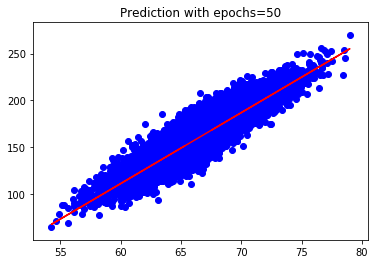

In [26]:
plt.plot(X_train, y_pred_train, color='red') 
plt.scatter(X_train, y_train, color='blue')
plt.title('Prediction with epochs=50')

Text(0.5, 1.0, 'Prediction with epochs=50')

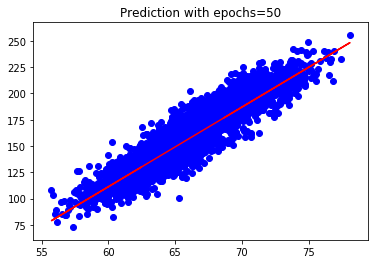

In [27]:
plt.plot(X_test, y_pred_test, color='red') 
plt.scatter(X_test, y_test, color='blue')
plt.title('Prediction with epochs=50')

In [28]:
# END